In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text

from PIL import Image
import urllib

In [4]:
df = pd.read_csv("cole.csv")

df.head()

,Unnamed: 0,Player,Date,Game ID,Season,Team,Opponent,Is Home,Position,TOI,...,FA,CF,CA,xGF,xGA,G±,S±,F±,C±,xG±
0,1,Cole Caufield,2021-10-13,2021020003,20212022,MTL,TOR,0,R,13.82,...,12.86,11.03,14.88,0.44,0.71,-0.94,1.17,-1.76,-3.85,-0.27
1,2,Cole Caufield,2021-10-14,2021020007,20212022,MTL,BUF,0,R,12.70,...,10.78,11.20,14.33,0.19,0.41,0.00,0.08,-1.26,-3.13,-0.23
2,3,Cole Caufield,2021-10-16,2021020023,20212022,MTL,NYR,1,R,10.53,...,7.47,6.58,8.64,0.16,0.13,0.00,-1.63,-2.81,-2.06,0.03
3,4,Cole Caufield,2021-10-19,2021020040,20212022,MTL,S.J,1,R,11.32,...,6.98,8.43,10.58,0.21,0.80,-1.06,-2.83,-2.68,-2.15,-0.59
4,5,Cole Caufield,2021-10-21,2021020052,20212022,MTL,CAR,1,R,11.50,...,12.91,7.14,13.01,0.27,0.58,-2.14,-6.32,-7.54,-5.87,-0.31


In [42]:
df["xGF_60"] = 60*df["xGF"]/df["TOI"]
df["xGA_60"] = 60*df["xGA"]/df["TOI"]

df = df[:-1]

df[df.Date> "2022-02-09"].head()

,Unnamed: 0,Player,Date,Game ID,Season,Team,Opponent,Is Home,Position,TOI,...,CA,xGF,xGA,G±,S±,F±,C±,xG±,xGF_60,xGA_60
30,31,Cole Caufield,2022-02-10,2021020587,20212022,MTL,WSH,1,R,7.03,...,2.36,0.53,0.14,0.00,5.06,4.99,7.12,0.40,4.523471,1.194879
31,32,Cole Caufield,2022-02-12,2021020630,20212022,MTL,CBJ,1,R,11.32,...,15.59,0.41,0.58,0.94,-0.82,-1.45,-2.43,-0.17,2.173145,3.074205
32,33,Cole Caufield,2022-02-13,2021020614,20212022,MTL,BUF,1,R,14.50,...,11.56,0.57,0.95,-3.19,-2.52,-2.09,-2.28,-0.38,2.358621,3.931034
33,34,Cole Caufield,2022-02-17,2021020796,20212022,MTL,STL,1,R,12.35,...,10.16,0.23,0.25,0.00,0.81,0.71,0.68,-0.02,1.117409,1.214575
34,35,Cole Caufield,2022-02-20,2021020491,20212022,MTL,NYI,0,R,15.12,...,4.71,0.60,0.13,0.12,5.61,7.96,8.34,0.47,2.380952,0.515873


In [32]:
# xG conceded and xG created
Y_for = df["xGF_60"].reset_index(drop = True)
Y_ag = df["xGA_60"].reset_index(drop = True)
X = pd.Series(range(1, len(df)+1))

Y_for = pd.Series(Y_for.rolling(window = 3, min_periods = 0).mean(), name="value")
Y_ag = pd.Series(Y_ag.rolling(window = 3, min_periods = 0).mean(), name="value")

Y_ag.head(100)

0     3.082489
1     2.509749
2     1.920079
3     2.306010
4     2.669037
        ...   
62    4.870996
63    3.245991
64    3.063268
65    3.055646
66    2.704033
Name: value, Length: 67, dtype: float64

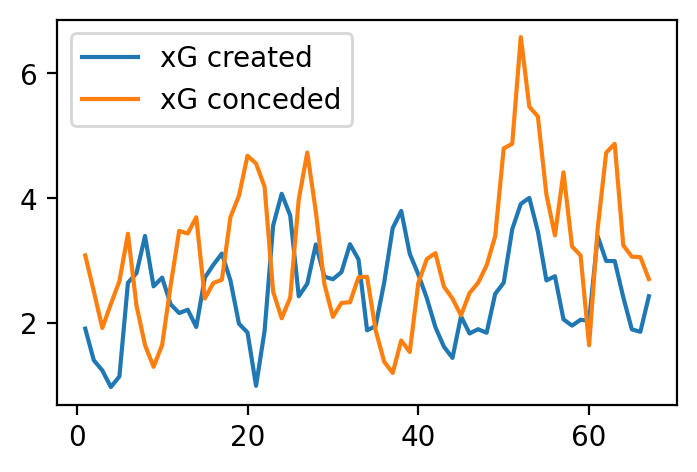

In [23]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

ax.legend()

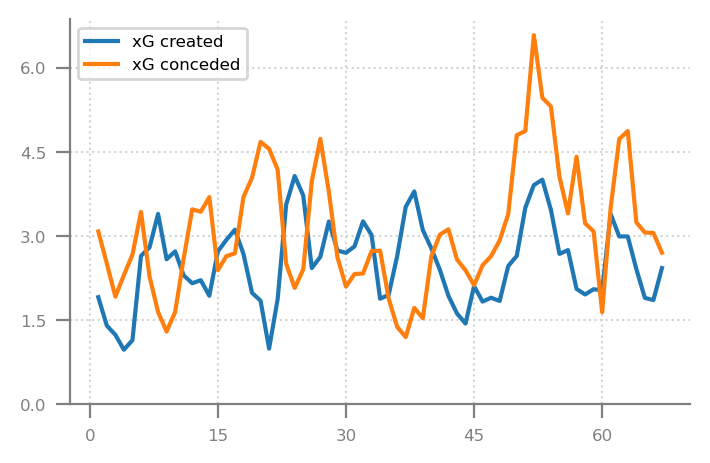

In [29]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey"
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

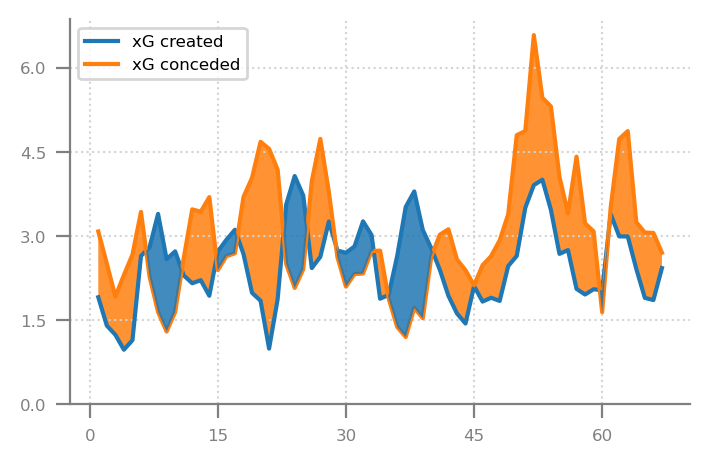

In [37]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

ax.plot(X, Y_for, label = "xG created")
ax.plot(X, Y_ag, label = "xG conceded")

# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for > Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag >= Y_for, 
    interpolate = True,
    alpha = 0.85
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))
ax.set_ylim(0)


ax.legend(fontsize = 6)

(-0.5, 1199.5, 820.5, -0.5)

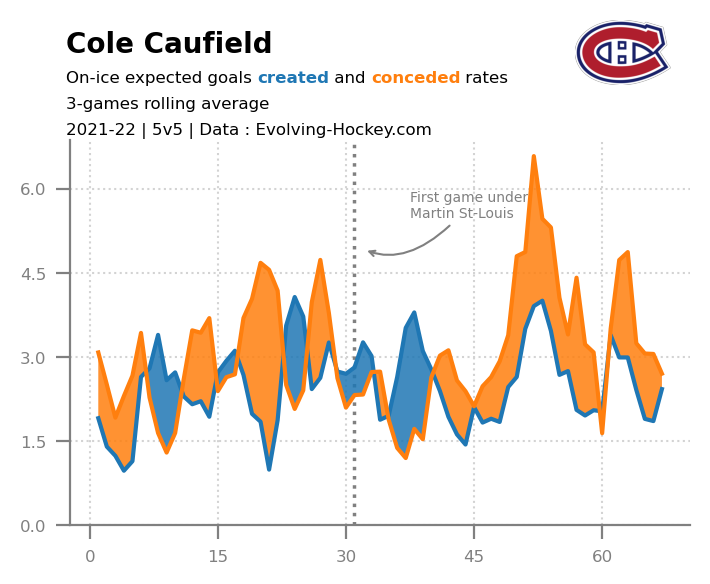

In [62]:
fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, zorder = 4)
line_2 = ax.plot(X, Y_ag, zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [31,31], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (31, 5),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "First game under\nMartin St-Louis",
    size = 5,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)

# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Cole Caufield",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fig_text(
    x = 0.12, y = 1.02,
    s = "On-ice expected goals <created> and <conceded> rates\n3-games rolling average\n2021-22 | 5v5 | Data : Evolving-Hockey.com ",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Montreal_Canadiens.svg/1200px-Montreal_Canadiens.svg.png"

logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}10204.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")

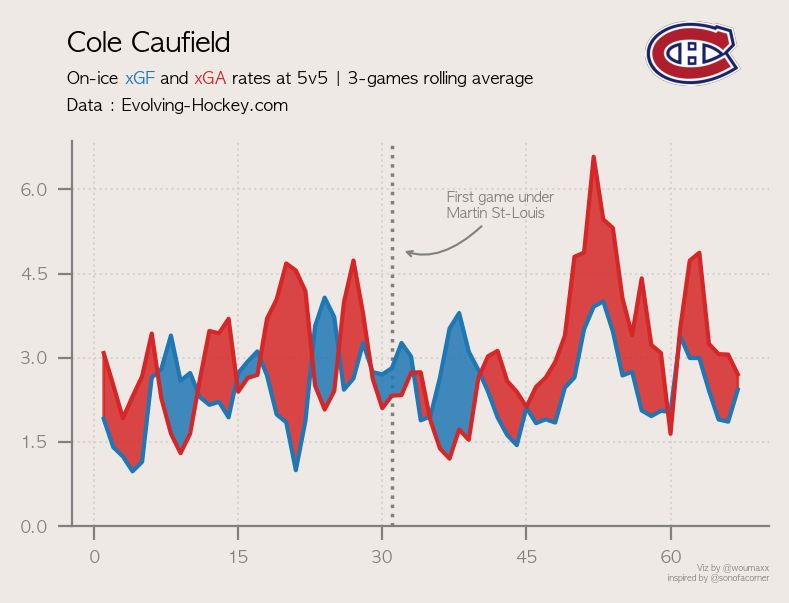

In [98]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

plt.rcParams["font.family"] = "AppleGothic"

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "C0", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "C3", zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [31,31], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1.25,
    color = "grey",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (31, 5),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "First game under\nMartin St-Louis",
    size = 5,
    color = "grey",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="grey", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    )) # Arrow to connect annotation
    
    
# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "grey",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.5))

# Title and subtitle for the legend
fig_text(
    x = 0.12, y = 1.1,
    s = "Cole Caufield",
    color = "black",
    weight = "bold",
    size = 10,
    annotationbbox_kw={"xycoords": "figure fraction"}
)


fig_text(
    x = 0.12, y = 1.02,
    s = "On-ice <xGF> and <xGA> rates at 5v5 | 3-games rolling average\nData : Evolving-Hockey.com\n",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "black",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Montreal_Canadiens.svg/1200px-Montreal_Canadiens.svg.png"
logo_ax = fig.add_axes([0.75, .99, 0.13, 0.13], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}10204.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")


fig.text(0.9, 0.000000001, "\nViz by @woumaxx\ninspired by @sonofacorner", ha="right", size=3, color="grey")
plt.savefig("ANODAVIZ.png", dpi=600, bbox_inches='tight')
plt.show()


In [74]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

Text(0.5, 0.5, 'bar')

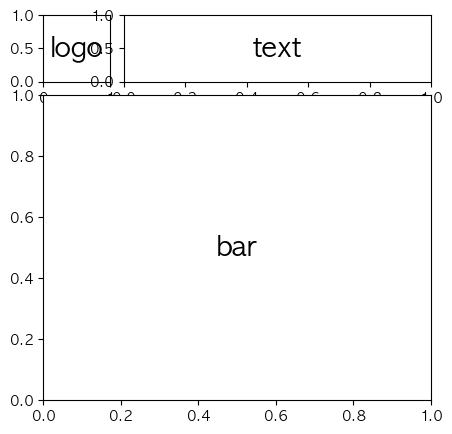

In [100]:
layout = [["logo"] + ["text"] * 4,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5,
          ["bar"] * 5]

fig = plt.figure(figsize = (5,5))

ax_dict = fig.subplot_mosaic(
    layout
)

ax_dict["logo"].annotate(
    xy = (.5,.5),
    text = "logo",
    ha = "center",
    va = "center",
    size = 20
)

ax_dict["text"].annotate(
    xy = (.5,.5),
    text = "text",
    ha = "center",
    va = "center",
    size = 20
)

ax_dict["bar"].annotate(
    xy = (.5,.5),
    text = "bar",
    ha = "center",
    va = "center",
    size = 20
)